In [1]:
import tensorflow as tf
# from tensorboard.plugins.hparams import api as hp
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
ratings = pd.read_pickle("./Data/reviews_20_1000_longform.pkl")

In [6]:
ratings.shape

(8854093, 3)

In [7]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()

item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()

nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

n_users, n_movies

(64815, 89418)

In [8]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.3, random_state=42)

In [9]:
X_train.shape, X_test.shape

((6197865, 3), (2656228, 3))

In [10]:
def train_test_model(output_bias):
    
    input_movies = keras.layers.Input(shape=[1])
    embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
    movies_out = keras.layers.Flatten()(embed_movies)

    input_users = keras.layers.Input(shape=[1])
    embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
    users_out = keras.layers.Flatten()(embed_users)

    bias = keras.initializers.Constant(output_bias)
    
    conc_layer = keras.layers.Concatenate()([movies_out, users_out])
    
    dense1 = keras.layers.Dense(128,activation='relu', kernel_regularizer='l2')(conc_layer)
    
    dropout1 = keras.layers.Dropout(rate=.6, seed=42)(dense1)
    
    dense2 = keras.layers.Dense(64,activation='relu', kernel_regularizer='l2')(dropout1)
    
    dropout2 = keras.layers.Dropout(rate=.5, seed=42)(dense2)
    
    dense3 = keras.layers.Dense(32, activation='relu', kernel_regularizer='l2')(dropout2)
    
    dropout3 = keras.layers.Dropout(rate=.4, seed=42)(dense3)
    
    dense4 = keras.layers.Dense(16, activation='relu', kernel_regularizer='l2')(dropout3)
    
    x_out = keras.layers.Dense(1, activation='relu', kernel_regularizer='l2', bias_initializer=bias)(dense3)

    model = keras.Model([input_movies, input_users], x_out)
    
    opt = tf.optimizers.Adam(learning_rate=.01)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())


#     print(hist.history['val_mean_squared_error'])
    return model

In [11]:
callback = keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                        min_delta=.001,
                                        patience=30,
                                        mode="auto",
                                        restore_best_weights=True)

In [19]:
model = train_test_model(output_bias=5)

In [20]:
output = model.fit([X_train.movie, X_train.user], 
             X_train.rating_score,  
             batch_size=len(X_train), epochs=100, validation_split=.2,
                  callbacks=[callback])

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 4.4744 - root_mean_squared_error: 1.6447 - val_loss: 3.8545 - val_root_mean_squared_error: 1.5178
Epoch 2/100
1/1 [==============================] - 9s 9s/step - loss: 3.8214 - root_mean_squared_error: 1.5068 - val_loss: 3.0560 - val_root_mean_squared_error: 1.2963
Epoch 3/100
1/1 [==============================] - 9s 9s/step - loss: 3.0492 - root_mean_squared_error: 1.2936 - val_loss: 2.3662 - val_root_mean_squared_error: 1.0638
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 2.4331 - root_mean_squared_error: 1.0948 - val_loss: 2.5686 - val_root_mean_squared_error: 1.2102
Epoch 5/100
1/1 [==============================] - 8s 8s/step - loss: 2.7663 - root_mean_squared_error: 1.2893 - val_loss: 2.1723 - val_root_mean_squared_error: 1.0933
Epoch 6/100
1/1 [==============================] - 8s 8s/step - loss: 2.3140 - root_mean_squared_error: 1.1563 - val_loss: 1.9114 - val_root_mean_squared_erro

1/1 [==============================] - 9s 9s/step - loss: 0.8488 - root_mean_squared_error: 0.8543 - val_loss: 0.8290 - val_root_mean_squared_error: 0.8442
Epoch 50/100
1/1 [==============================] - 9s 9s/step - loss: 0.8445 - root_mean_squared_error: 0.8533 - val_loss: 0.8265 - val_root_mean_squared_error: 0.8446
Epoch 51/100
1/1 [==============================] - 9s 9s/step - loss: 0.8396 - root_mean_squared_error: 0.8524 - val_loss: 0.8262 - val_root_mean_squared_error: 0.8465
Epoch 52/100
1/1 [==============================] - 9s 9s/step - loss: 0.8365 - root_mean_squared_error: 0.8525 - val_loss: 0.8268 - val_root_mean_squared_error: 0.8485
Epoch 53/100
1/1 [==============================] - 9s 9s/step - loss: 0.8350 - root_mean_squared_error: 0.8533 - val_loss: 0.8249 - val_root_mean_squared_error: 0.8486
Epoch 54/100
1/1 [==============================] - 9s 9s/step - loss: 0.8329 - root_mean_squared_error: 0.8533 - val_loss: 0.8203 - val_root_mean_squared_error: 0.8466

1/1 [==============================] - 8s 8s/step - loss: 0.7770 - root_mean_squared_error: 0.8437 - val_loss: 0.7732 - val_root_mean_squared_error: 0.8416
Epoch 98/100
1/1 [==============================] - 8s 8s/step - loss: 0.7763 - root_mean_squared_error: 0.8434 - val_loss: 0.7726 - val_root_mean_squared_error: 0.8414
Epoch 99/100
1/1 [==============================] - 8s 8s/step - loss: 0.7761 - root_mean_squared_error: 0.8434 - val_loss: 0.7722 - val_root_mean_squared_error: 0.8414
Epoch 100/100
1/1 [==============================] - 9s 9s/step - loss: 0.7751 - root_mean_squared_error: 0.8431 - val_loss: 0.7719 - val_root_mean_squared_error: 0.8415


In [21]:
callback.best

0.8419188261032104

In [121]:
callback.monitor

'val_root_mean_squared_error'

In [122]:
callback.model

In [ ]:
output2 = model.fit([X_train.movie, X_train.user], 
             X_train.rating_score,  
             batch_size=len(X_train), epochs=10, validation_split=.2,
                  callbacks=[callback])

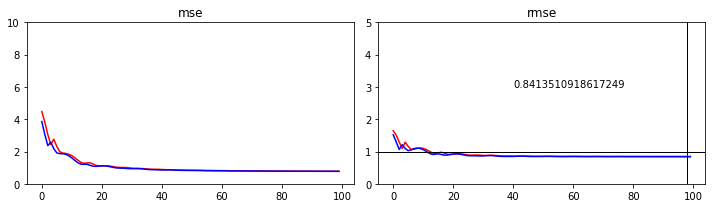

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))


axs[0].plot(output.history['loss'], color='r')
axs[0].plot(output.history['val_loss'], color='b')

axs[1].plot(output.history['root_mean_squared_error'], color='r')
axs[1].plot(output.history['val_root_mean_squared_error'], color='b')
axs[1].axvline(np.where(output.history['val_root_mean_squared_error']==np.min(output.history['val_root_mean_squared_error'])), 
                 color='k', lw=1)
axs[1].annotate(str(np.min(output.history['val_root_mean_squared_error'])),
                    xy=(40,3),)

#     title_str = '-'.join(str(run_history[key]['params'][param]) for param in run_history[key]['params'].keys(),
#                         xytext=(.8,.8), xycoords='subfigure fraction')

axs[0].set_title("mse")
axs[1].set_title("rmse")

axs[0].set_ylim(0,10)
axs[1].set_ylim(0,5)

axs[1].axhline(1, color='k', lw=1)
    
plt.tight_layout()   
plt.show()

In [90]:
len(output.history['loss'])

100

In [91]:
model.trainable_variables

[<tf.Variable 'embedding_14/embeddings:0' shape=(89419, 15) dtype=float32, numpy=
 array([[-0.04060972, -0.0408831 , -0.07540319, ...,  0.05272159,
         -0.01610826,  0.03636319],
        [-0.07631765,  0.01794105, -0.00635751, ..., -0.0513144 ,
         -0.06476335, -0.01258612],
        [-0.02940135, -0.03517935, -0.00887026, ...,  0.12255664,
          0.15908323,  0.02870064],
        ...,
        [ 0.02127912,  0.04027199,  0.00054735, ..., -0.1885152 ,
         -0.03283613, -0.06176513],
        [ 0.01619839,  0.04960533,  0.02113556, ...,  0.09155231,
          0.01556375,  0.04586617],
        [ 0.01719183,  0.03272376, -0.01236945, ...,  0.01487299,
         -0.04141879,  0.04155825]], dtype=float32)>,
 <tf.Variable 'embedding_15/embeddings:0' shape=(64816, 15) dtype=float32, numpy=
 array([[-0.07097471, -0.10677434, -0.12696075, ..., -0.08312505,
         -0.07205073, -0.0492179 ],
        [ 0.0753029 , -0.00496834, -0.00133236, ...,  0.05152988,
          0.0306449 , -0.

In [92]:
!mkdir -p saved_model
model.save('saved_model/rmse_845')

INFO:tensorflow:Assets written to: saved_model/rmse_845/assets


In [93]:
model.save('saved_model/rmse_845/model.h5')

In [94]:
X_train.groupby('rating_score').count()

,movie,user
rating_score,,
1,223618,223618
2,562898,562898
3,1558336,1558336
4,2254707,2254707
5,1598298,1598298


In [23]:
import random
from itertools import chain
def flatten(list_of_lists):
    "Flatten one level of nesting"
    return chain.from_iterable(list_of_lists)

In [24]:
X_train

,movie,user,rating_score
11862877,91,8097,4
6424992,12048,44363,3
12709205,176,21194,4
8348272,28179,7508,3
5786658,9053,3915,3
...,...,...,...
13103465,212,52317,4
3382914,3297,11310,5
7663495,20601,24438,4
12216666,136,24176,4


In [25]:
X_train.groupby('user').count().sort_values(by='movie',ascending=False).head()

,movie,rating_score
user,,
49758,735,735
46967,734,734
14547,722,722
40854,719,719
20490,718,718


In [26]:
user = 58315
ratings[ratings.user==user]

,movie_id,rating_score,user_id,user,movie
13381,1085,4,89904558,58315,1038
19800,1094,4,89904558,58315,1047
23850,1099,2,89904558,58315,1052
35843,1103,5,89904558,58315,1056
48584,1116,3,89904558,58315,1069
...,...,...,...,...,...
15428890,981,2,89904558,58315,941
15489675,1046,3,89904558,58315,1002
15493413,1047,2,89904558,58315,1003
15498925,1049,2,89904558,58315,1005


In [27]:
movie_array = ratings[ratings.user==user].movie.values.astype(int)
user_array = np.array([int(user) for n in range(len(movie_array))])

In [28]:
pred = model.predict([movie_array, user_array])

In [29]:
def is_close_enough(pred, ratings):
    val = []
    for pair in zip(pred, ratings):
        if pair[1] == 5:
            val.append(pair[1] - 1 <= pair[0])
        else:
            val.append(pair[1] - .5 <= pair[0] <= pair[1] + .5)
        
    return val

In [30]:
val = is_close_enough(np.round(pred.flatten(), 1), ratings[ratings.user==user].rating_score.values)

In [31]:
sum(val) / len(pred.flatten())

0.5390781563126252

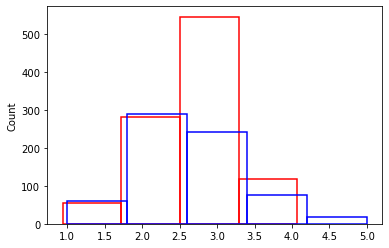

In [32]:
sns.histplot(pred.flatten(), bins=4, color='red', fill=False)
sns.histplot(X_train[X_train.user==user].rating_score.values, bins=5, color='blue', fill=False)

plt.show()

In [33]:
top_20_users = X_train.groupby('user').count().sort_values(by='movie',ascending=False).head(20).index

In [34]:
predictions = []

for user in top_20_users:
    movie_array = X_train[X_train.user==user].movie.values.astype(int)
    user_array = np.array([int(user) for n in range(len(movie_array))])
    pred = model.predict([movie_array, user_array])
    val = is_close_enough(np.round(pred.flatten(), 1), ratings[ratings.user==user].rating_score.values)
    
    predictions.append(list(pred.flatten()))
    print(user, sum(val) / len(pred.flatten()))

49758 0.4108843537414966
46967 0.39509536784741145
14547 0.3808864265927978
40854 0.42141863699582754
20490 0.31058495821727017
13686 0.4225941422594142
18058 0.33751743375174337
28524 0.4307692307692308
38238 0.40168539325842695
13828 0.37640449438202245
41054 0.41631504922644164
1380 0.3765867418899859
55147 0.3177966101694915
10210 0.39462517680339465
5321 0.38613861386138615
14125 0.4688385269121813
6497 0.34985835694050993
17796 0.4192634560906516
59336 0.41134751773049644
2488 0.5411931818181818


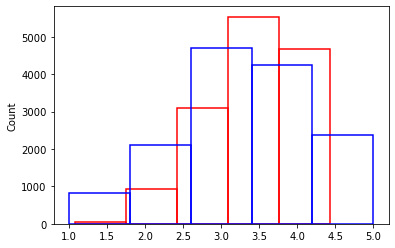

In [35]:
sns.histplot(list(flatten(predictions)), bins=5, color='red', fill=False)
sns.histplot(X_train[X_train.user.isin(top_20_users)].rating_score.values, bins=5, color='blue', fill=False)

plt.show()